<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Structured_Dataset/blob/main/dataset_abalone(binary_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building and training neural network models using TensorFlow 2.x
You need to understand the foundational principles of machine learning (ML) and deep learning (DL)
>using TensorFlow 2.x. You need to know how to:
* ❏ Use TensorFlow 2.x.
* ❏ Build, compile and train machine learning (ML) models using TensorFlow.
* ❏ Preprocess data to get it ready for use in a model.
* ❏ Use models to predict results.
* ❏ Build sequential models with multiple layers
* ❏ Build and train models for binary classification.
* ❏ Build and train models for multi-class categorization.
* ❏ Plot loss and accuracy of a trained model.
* ❏ Identify strategies to prevent overfitting, including augmentation and dropout.
* ❏ Use pretrained models (transfer learning).
* ❏ Extract features from pre-trained models.
* ❏ Ensure that inputs to a model are in the correct shape.
* ❏ Ensure that you can match test data to the input shape of a neural network.
* ❏ Ensure you can match output data of a neural network to specified input shape for test data.
* ❏ Understand batch loading of data.
* ❏ Use callbacks to trigger the end of training cycles.
* ❏ Use datasets from different sources.
* ❏ Use datasets in different formats, including json and csv.
* ❏ Use datasets from tf.data.datasets.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:
# TensorFlow 2.x.
tf.__version__

'2.8.0'

In [7]:
## calling the dataset:
dataset_abalone=pd.read_csv("/content/abalone.csv",index_col=False)

In [8]:
dataset_abalone.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

ct=make_column_transformer(
                           (MinMaxScaler(),["LongestShell","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight",]),
                           (OneHotEncoder(handle_unknown="ignore"),["Type"])
                           )
ct


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['LongestShell', 'Diameter', 'Height',
                                  'WholeWeight', 'ShuckedWeight',
                                  'VisceraWeight', 'ShellWeight']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Type'])])

In [17]:
# Create x & y
x = dataset_abalone.drop("Rings", axis=1)
y = dataset_abalone["Rings"]

# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [19]:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# # Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [20]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
x_train_normal.shape, x_train.shape

((3341, 10), (3341, 8))

In [55]:
## callback
# Create a function to implement a ModelCheckpoint callback with a specific filename 
callbacks= tf.keras.callbacks.ModelCheckpoint(filepath=("/content/callback/dataset_abalone_model"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Create a function to implement a Earlystop callback with loss monitor)
Early_stop=tf.keras.callbacks.EarlyStopping( monitor='loss',
                                             patience=10,
                                             verbose=0)

In [47]:
# Set random seed
tf.random.set_seed(21)

# Build the model (3 layers, 100, 10, 1 units)
dataset_abalone_model = tf.keras.Sequential([
                                              tf.keras.layers.Dense(100),
                                              tf.keras.layers.Dense(10),
                                              tf.keras.layers.Dense(1)
                                          ])

# Compile the model
dataset_abalone_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history=dataset_abalone_model.fit(x_train_normal, y_train, epochs=1000, verbose=0,callbacks=[callbacks,Early_stop])


#history=dataset_abalone_model.fit(x_train_normal, y_train, epochs=1000, verbose=0,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200,restore_best_weights=True),
                       #tf.keras.callbacks.ReduceLROnPlateau(monitor=loss',Patience=100,verbose=1)])

In [29]:
mean_abs_error,model_loss=dataset_abalone_model.evaluate(x_test_normal,y_test)

27/27 [==============================] - 0s 2ms/step - loss: 1.6351 - mae: 1.6351


In [56]:
# loading gth emodel tf.keras.models.load_model('path/to/location')
#best_model=tf.keras.models.load_model('/content/callbacks')
#best_model.evaluate(x_test_normal,y_test)

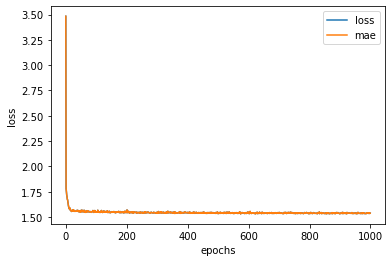

In [48]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

In [38]:
model_preds=dataset_abalone_model.predict(x_test_normal)

In [44]:
pred=tf.cast(model_preds, tf.int32)
pred[:10]

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[10],
       [10],
       [ 8],
       [ 8],
       [ 7],
       [ 8],
       [11],
       [11],
       [ 9],
       [ 7]], dtype=int32)>

In [32]:
y_test[:10]

1189    12
342     12
1581     8
3021     9
3325    10
282      9
1974    10
1741    10
1804    10
267      8
Name: Rings, dtype: int64

In [33]:
# Save a model using the SavedModel format
dataset_abalone_model.save('best_model_SavedModel_format.h5')

In [57]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format.h5")
loaded_saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_saved_model.predict(x_test_normal)

In [81]:
np.isclose(tf.keras.metrics.mean_absolute_error(y_test, h5_model_preds.squeeze()).numpy(), tf.keras.metrics.mean_absolute_error(y_test, model_preds.squeeze()).numpy())

False

In [73]:
tf.keras.metrics.mean_absolute_error(y_test, h5_model_preds.squeeze()).numpy()

1.6306567

In [75]:
tf.keras.metrics.mean_absolute_error(y_test, model_preds.squeeze()).numpy()

1.6350607